**<font size="5">Applied Statistics</font>**

<font size="3">MSc in High Performance Computing Engineering, Computer Science and Engineering, Physics Engineering - A.Y. 2024-2025</font>

Prof. Mario Beraha - Dott. Vittorio Torri

---

<font size="4">**Lab 4 - K-Means and Gaussian Mixture Models clustering**</font>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris, make_blobs, make_moons
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize
from matplotlib.patches import Ellipse
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# K-Means

## Iterative Simulation

Simulate data belonging to three clusters

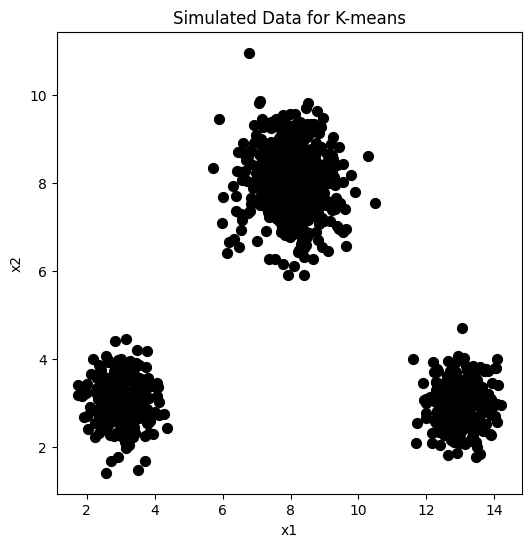

In [2]:
np.random.seed(1)

clusterA = np.random.normal([8,8], .75, (500,2))
clusterB = np.random.normal([3,3], .5, (250,2))
clusterC = np.random.normal([13,3], .5, (250,2))

x_data = np.concatenate((clusterA, clusterB, clusterC))

plt.figure(figsize=(6,6))
plt.scatter(x_data[:,0], x_data[:,1], c='black', s=50)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Simulated Data for K-means")
plt.show()

Simulate k-means step-by-step execution

iteration  0
[[8.17888718 5.73646988]
 [7.98152621 5.55164672]
 [7.91311058 5.25665717]]
iteration  1
[[9.32152254 6.86728762]
 [6.45144978 6.86941434]
 [5.60283074 2.89630097]]
iteration  2
[[10.58292546  5.66990775]
 [ 7.35451667  8.09879361]
 [ 3.03964586  3.03814593]]
iteration  3
[[12.82753185  3.16195038]
 [ 8.00178631  8.05165588]
 [ 3.03964586  3.03814593]]
iteration  4
[[12.99259293  2.98426617]
 [ 8.03507366  8.02314505]
 [ 3.03964586  3.03814593]]


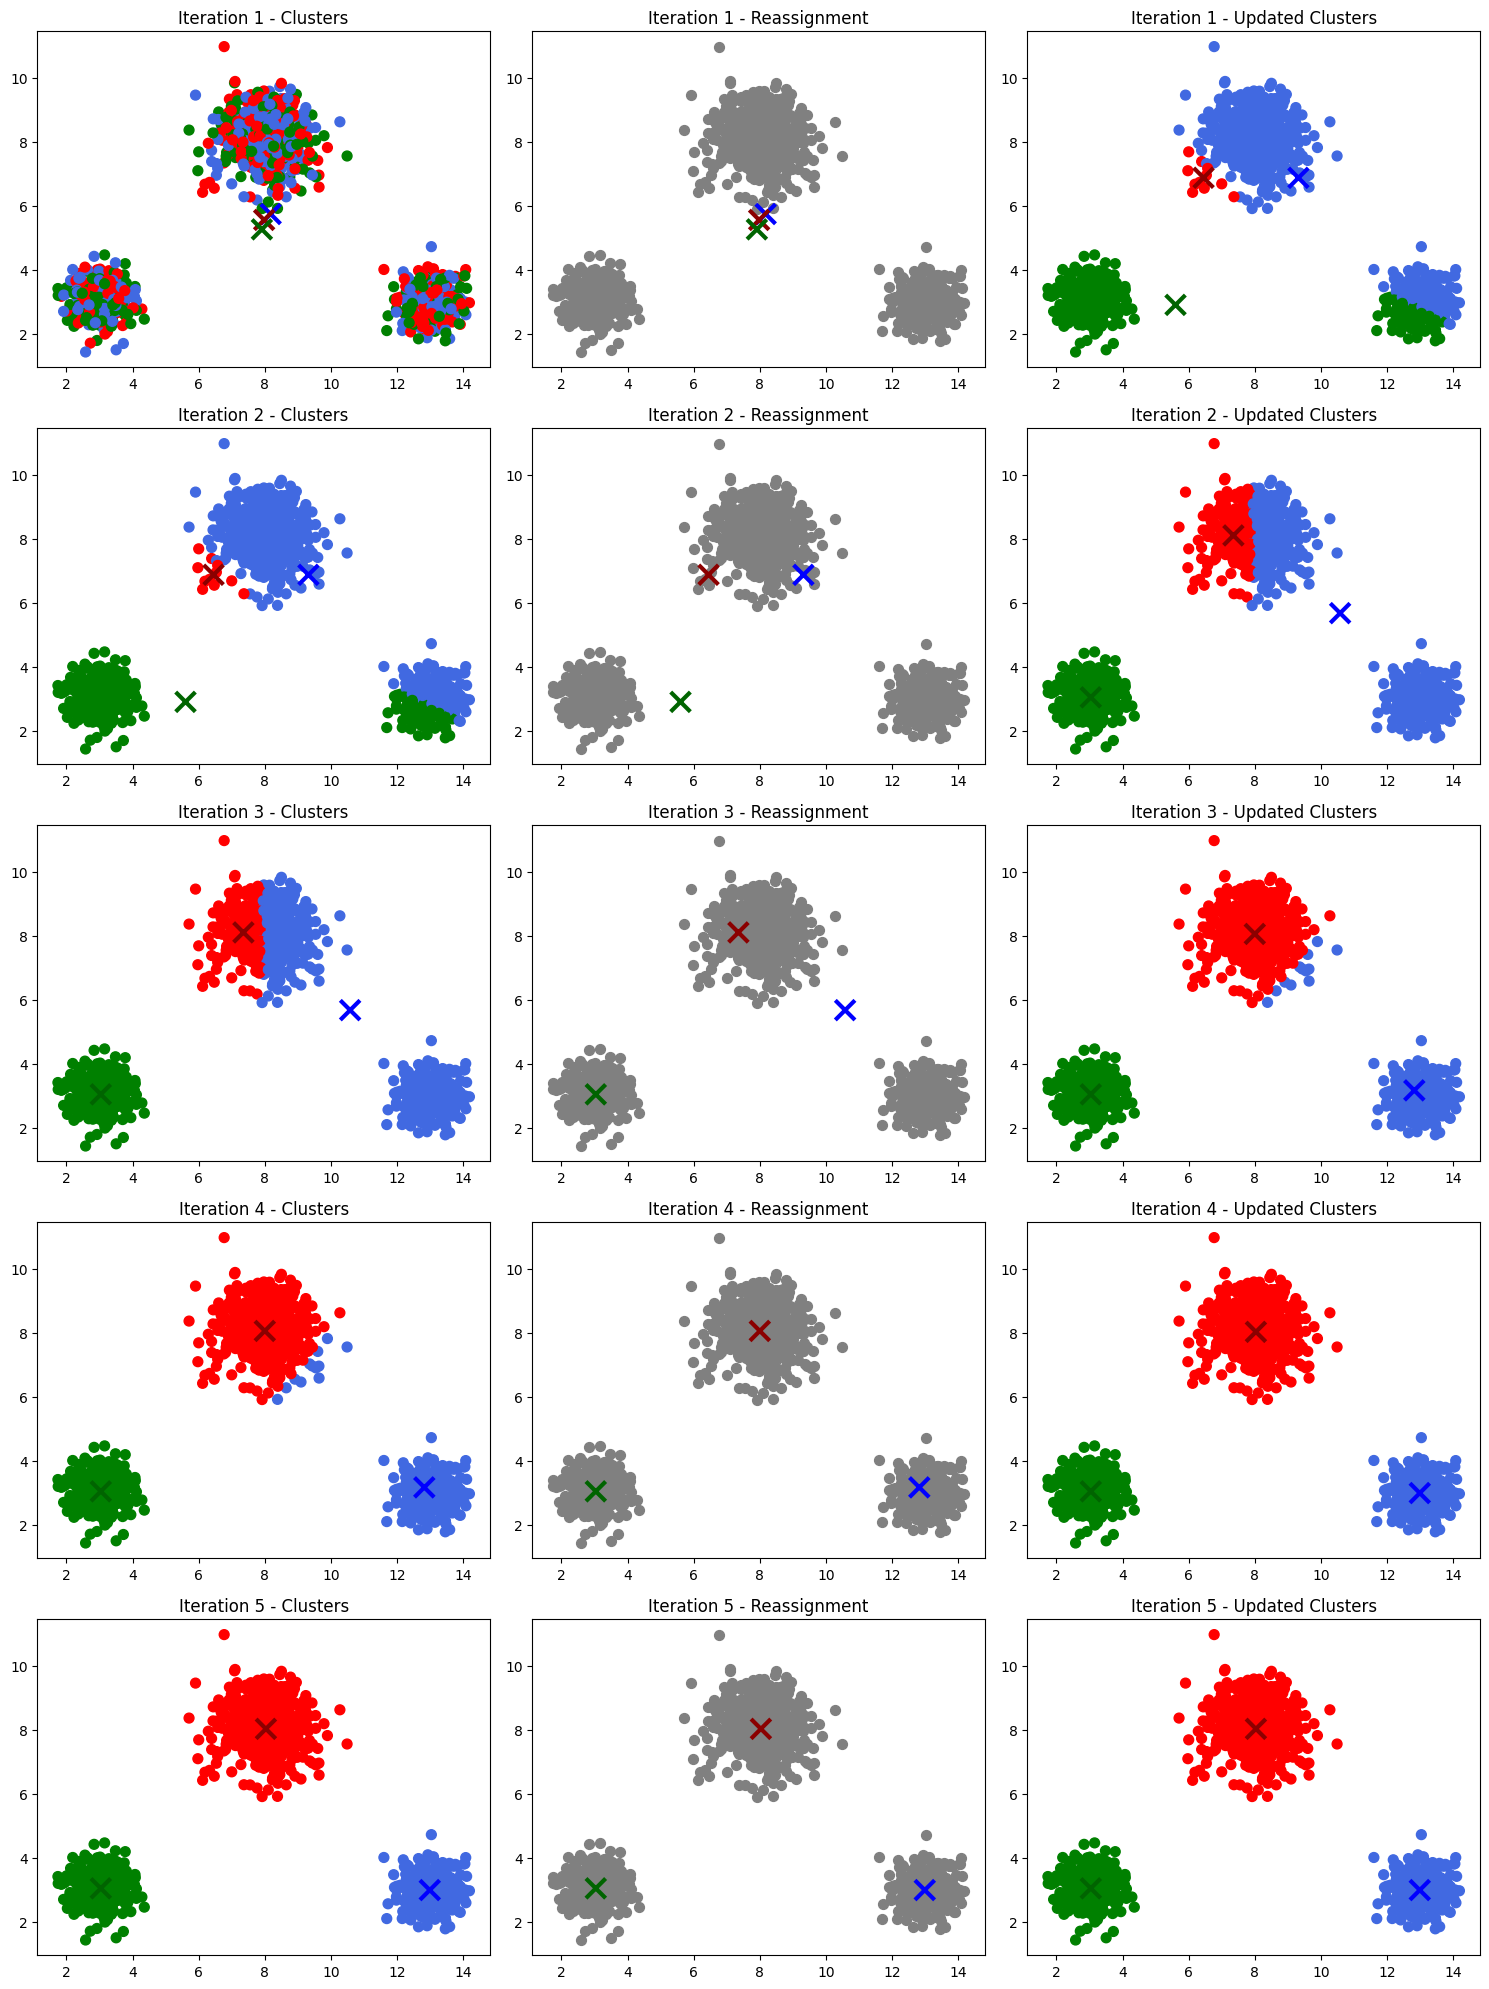

In [3]:
k = 3
n=1000
np.random.seed(0)
# Initial random cluster assignments
cluster_assign = np.random.choice([0, 1, 2], size=n)
iter_max = 5

colplot = ['royalblue', 'red', 'green']
colpoints = ['blue', 'darkred', 'darkgreen']

fig, axs = plt.subplots(iter_max, 3, figsize=(15, 4 * iter_max))
for i in range(iter_max):
    print('iteration ', i)
    # Compute cluster centers:
    C = np.array([x_data[cluster_assign == l].mean(axis=0) for l in range(k)])
    print(C)
    # Plot current clustering:
    axs[i, 0].scatter(x_data[:,0], x_data[:,1],
                      c=[colplot[c] for c in cluster_assign], s=50)
    axs[i, 0].scatter(C[:,0], C[:,1], c=colpoints, marker='x', s=200, linewidths=3)
    axs[i, 0].set_title(f"Iteration {i+1} - Clusters")

    # Reassign clusters based on Euclidean distance:
    D = np.linalg.norm(x_data[:, None, :] - C[None, :, :], axis=2)
    cluster_assign = np.argmin(D, axis=1)

    axs[i, 1].scatter(x_data[:,0], x_data[:,1], c='grey', s=50)
    axs[i, 1].scatter(C[:,0], C[:,1], c=colpoints, marker='x', s=200, linewidths=3)
    axs[i, 1].set_title(f"Iteration {i+1} - Reassignment")

    # After reassignment, update centers and plot:
    C = np.array([x_data[cluster_assign == l].mean(axis=0) for l in range(k)])
    axs[i, 2].scatter(x_data[:,0], x_data[:,1],
                      c=[colplot[c] for c in cluster_assign], s=50)
    axs[i, 2].scatter(C[:,0], C[:,1], c=colpoints, marker='x', s=200, linewidths=3)
    axs[i, 2].set_title(f"Iteration {i+1} - Updated Clusters")
plt.tight_layout()
plt.show()

## Earthquake dataset

In [4]:
# Load the quakes dataset from R via statsmodels
quakes = sm.datasets.get_rdataset("quakes", "datasets").data
Q = quakes.iloc[:, :2].copy()
Q['depth'] = -quakes.iloc[:, 2] / 100
print(Q)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1028)>

In [5]:
kmeans_result = KMeans(n_clusters=2, random_state=42).fit(Q)
print("K-means clusters (Earthquakes):\n", kmeans_result.labels_)
print("K-means centers:\n", kmeans_result.cluster_centers_)

K-means clusters (Earthquakes):
 [0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 

In [6]:
print(kmeans_result.cluster_centers_[1,0])
print(kmeans_result.cluster_centers_[1,1])
print(kmeans_result.cluster_centers_[1,2])

-15.877853658536587
168.25980487804878
-1.6963902439024383


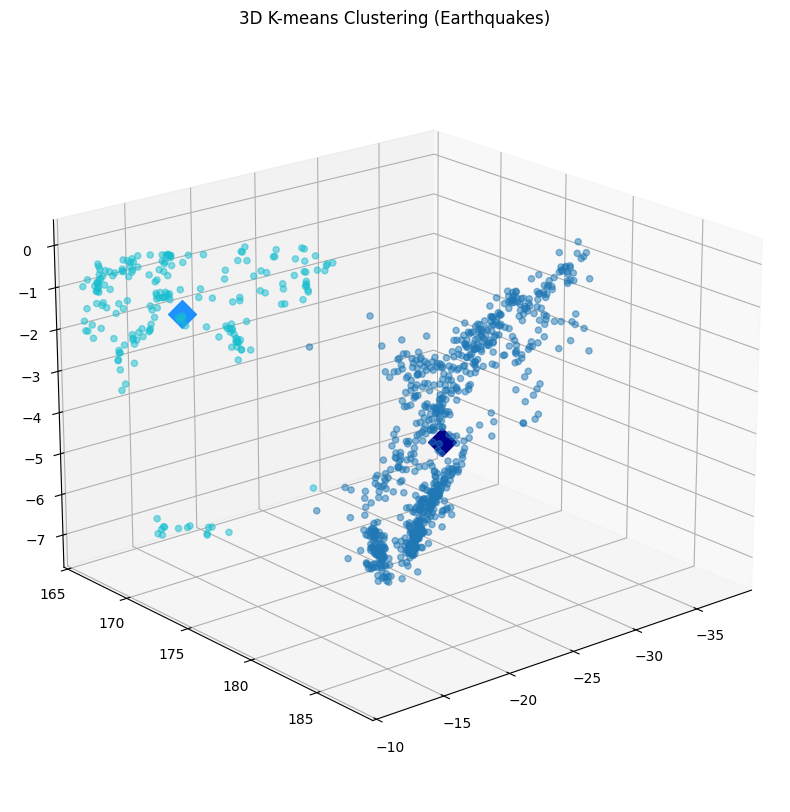

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(Q.iloc[:,0].min()-1, Q.iloc[:,0].max()+1)
ax.set_ylim(Q.iloc[:,1].min()-1, Q.iloc[:,1].max()+1)
ax.set_zlim(Q['depth'].min()-1, Q['depth'].max()+1)
ax.scatter(Q.iloc[:,0], Q.iloc[:,1], Q['depth'], cmap='tab10', c=kmeans_result.labels_+1, s=20, alpha=0.5)
ax.scatter(kmeans_result.cluster_centers_[1,0],
           kmeans_result.cluster_centers_[1,1],
           kmeans_result.cluster_centers_[1,2],
           c='dodgerblue', s=200, marker='D', alpha=1)
ax.scatter(kmeans_result.cluster_centers_[0,0],
           kmeans_result.cluster_centers_[0,1],
           kmeans_result.cluster_centers_[0,2],
           c='darkblue', s=200, marker='D', alpha=1)
ax.set_title("3D K-means Clustering (Earthquakes)")
ax.view_init(elev=20, azim=50)
plt.show()

How to choose k

We can use WSS and BSS or a combination of them called variability ratio:

$$
\text{Variability ratio} = \frac{WSS}{WSS+BSS}
$$

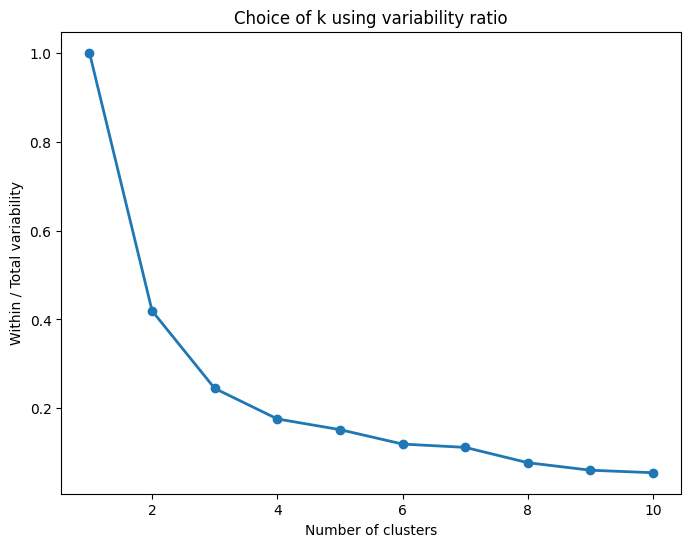

In [8]:
w = []
b = []
Q_values = Q.values
totss = np.sum((Q_values - Q_values.mean(axis=0))**2)
for k_val in range(1, 11):
    km = KMeans(n_clusters=k_val, random_state=42).fit(Q)
    withinss = km.inertia_ # WSS
    between_ss = totss - withinss
    w.append(withinss)
    b.append(between_ss)
ratio = np.array(w) / (np.array(w) + np.array(b))
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), ratio, marker='o', linewidth=2)
plt.xlabel("Number of clusters")
plt.ylabel("Within / Total variability")
plt.title("Choice of k using variability ratio")
plt.show()

The variability ratio suggests k = 2 or 4. Let’s try k = 4

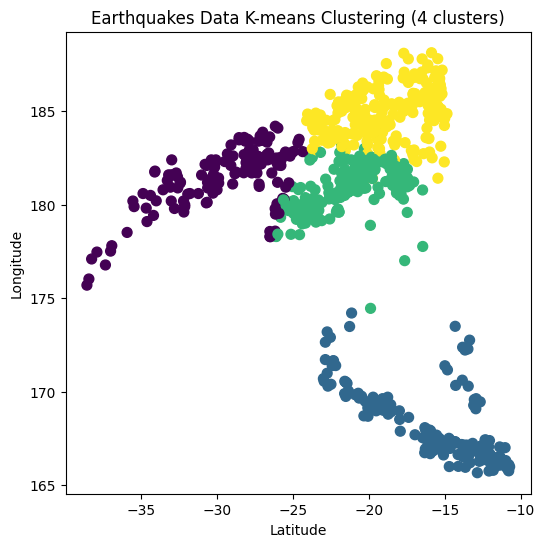

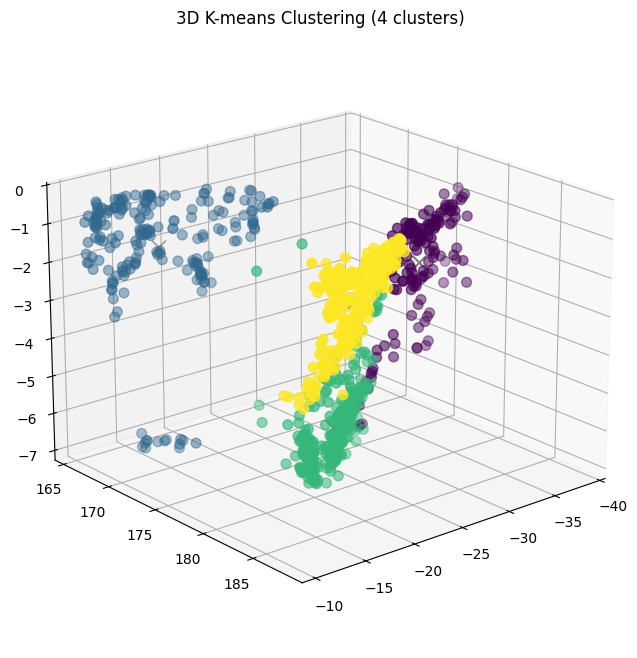

In [9]:
kmeans_result4 = KMeans(n_clusters=4, random_state=42).fit(Q)
plt.figure(figsize=(6,6))
plt.scatter(Q.iloc[:,0], Q.iloc[:,1], c=kmeans_result4.labels_+1, s=50)
plt.title("Earthquakes Data K-means Clustering (4 clusters)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Q.iloc[:,0], Q.iloc[:,1], Q['depth'], c=kmeans_result4.labels_+1, s=50)
ax.scatter(kmeans_result4.cluster_centers_[:,0],
           kmeans_result4.cluster_centers_[:,1],
           kmeans_result4.cluster_centers_[:,2],
           c='black', s=100, marker='x')
ax.set_title("3D K-means Clustering (4 clusters)")
ax.view_init(elev=20, azim=50)
plt.show()

##Iris (with silhouette)

Silhouette is both a measure of cohesion and separation of clusters. It is based on the difference between the average distance to points in the closest cluster and to points in the same cluster. For each point $x_i$ we calculate its silhouette coefficient $s_i$ as,

$s(x_i) = \frac{b(x_i)-a(x_i)}{max\{a(x_i),b(x_i)\}}$

Where $a(x_i)$ is the average distance between item $x_i$ and all other data within the same cluster; $b(x_i)$ is the mean distances from x_i to points in the closest cluster.

The $s_i$ value of a point $x_i$ lies in the interval [−1,+1]:
- A value close to +1 indicates that $x_i$ is much closer to points in its own cluster and is far from other clusters.
- A value close to zero indicates that $x_i$ is close to the boundary between two clusters.
- A value close to −1 indicates that $x_i$ is much closer to another cluster than its own cluster, and therefore, the point may be mis-clustered.

Silhouette analysis can be used to study the separation distance between the
resulting clusters. The silhouette plot displays a measure of how close each
point in one cluster is to points in the neighboring clusters and thus provides
a way to assess parameters like number of clusters visually. This measure has a
range of [-1, 1].

The **Silhouette Coefficient** is defined as the mean $s_i$ value across all the points. A value close to +1 indicates a good clustering.

$SC = \frac{1}{n} \sum_i s_i$

<b>Drawbacks</b>: note that the Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN (not presented in this course).

In [10]:
iris_data = load_iris()
iris4 = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
species_name = iris_data.target
iris = iris4.copy()
iris['target'] = species_name

In [11]:
iris4

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

For n_clusters = 2 The average silhouette_score is : 0.6810461692117465
For n_clusters = 3 The average silhouette_score is : 0.5511916046195927
For n_clusters = 4 The average silhouette_score is : 0.49535632852885064
For n_clusters = 5 The average silhouette_score is : 0.48989824728439524
For n_clusters = 6 The average silhouette_score is : 0.47711750058213453


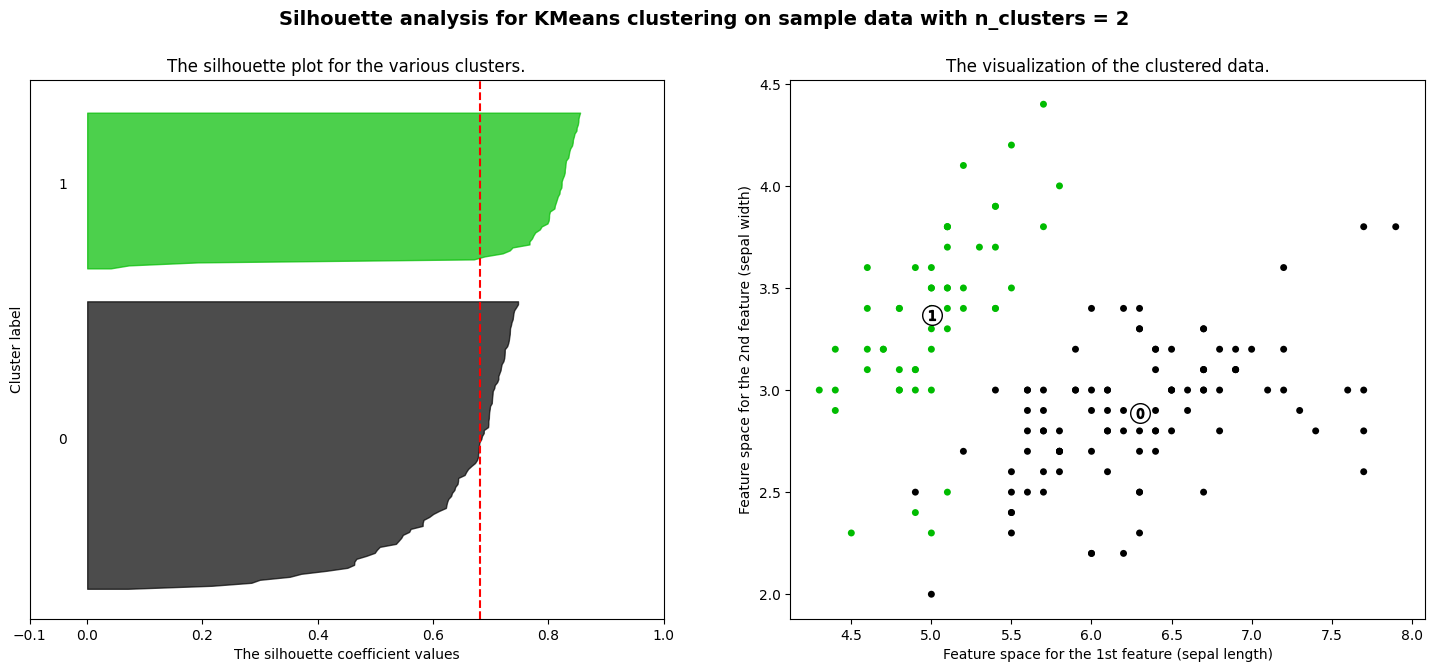

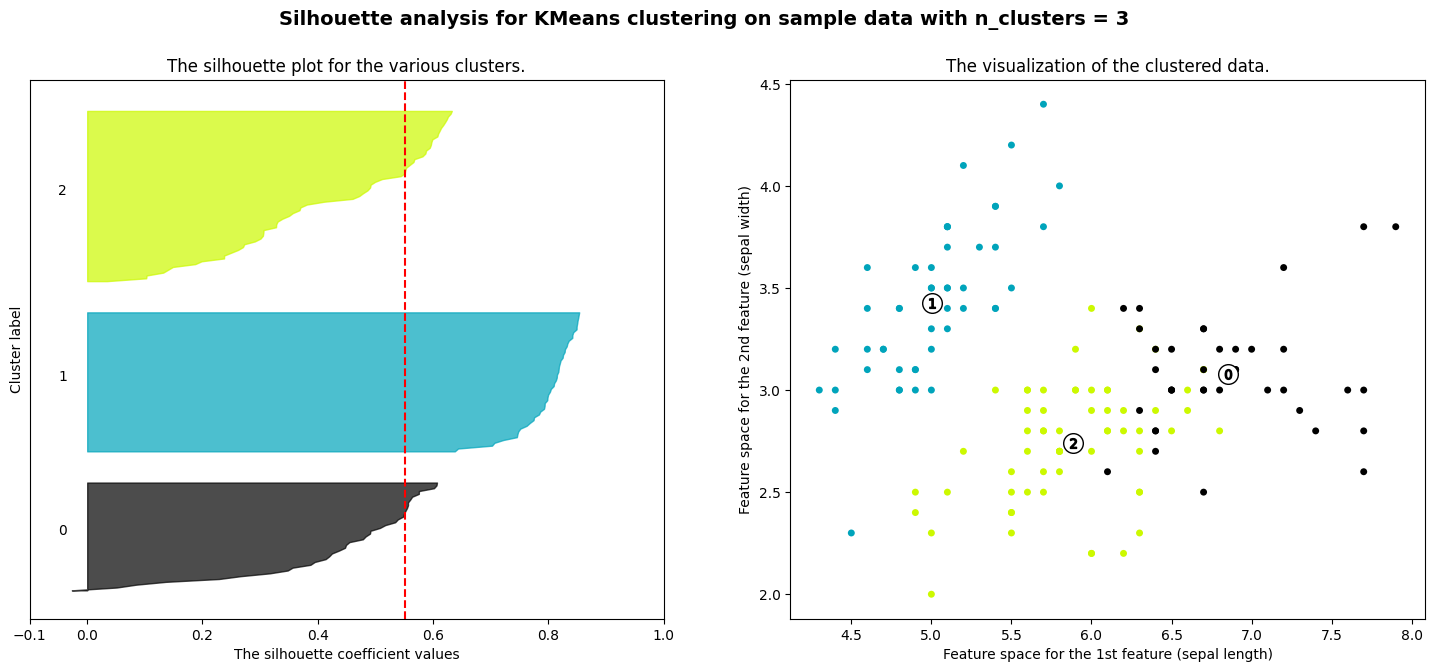

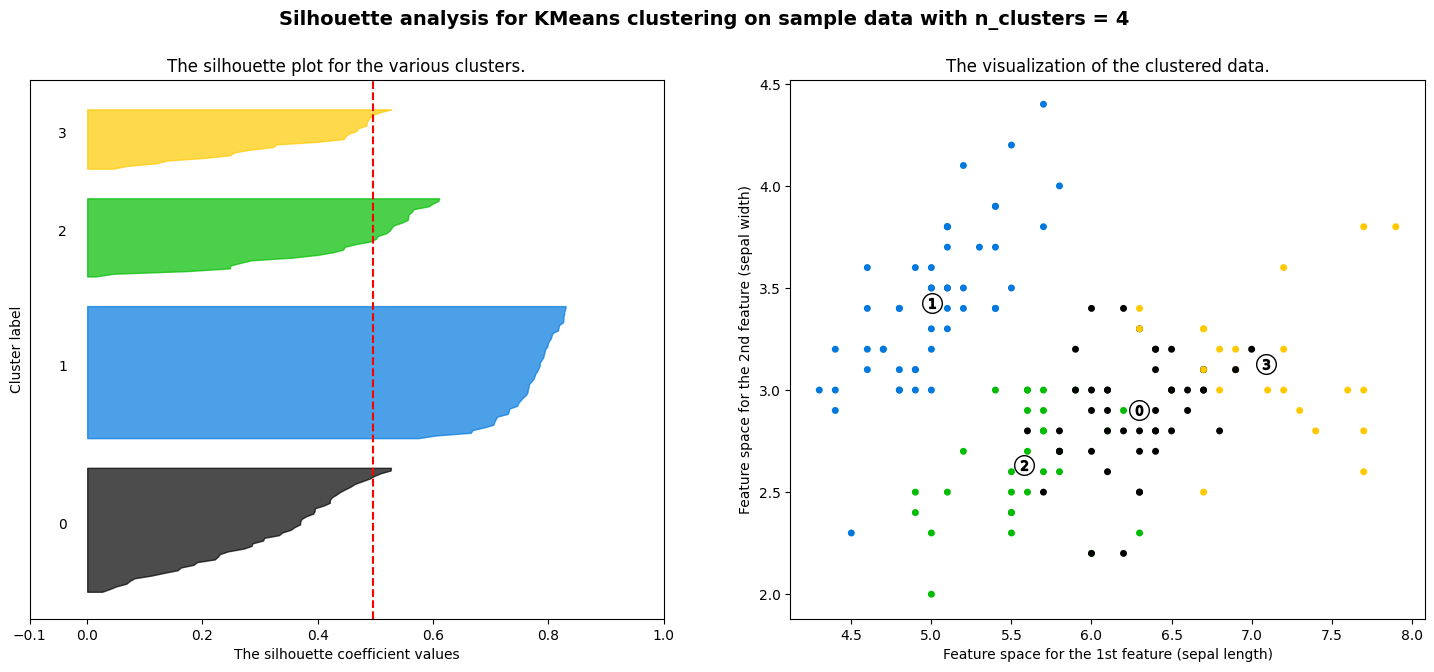

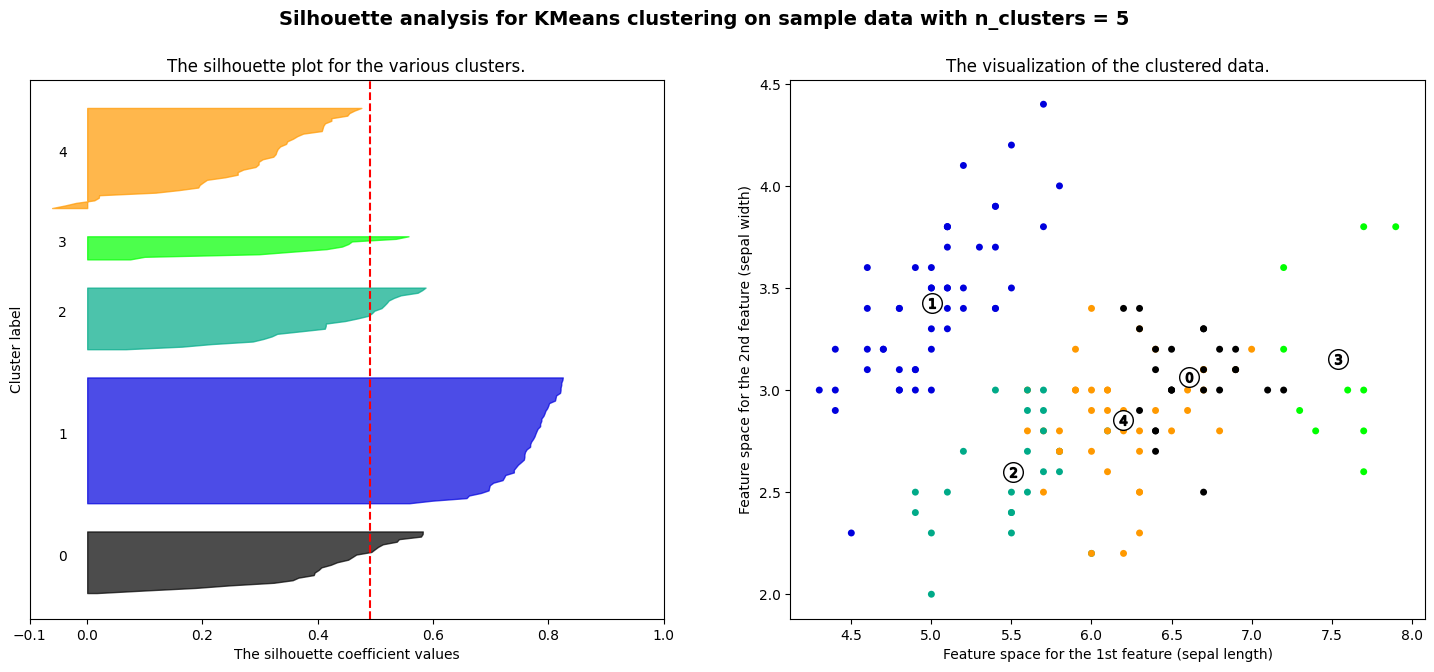

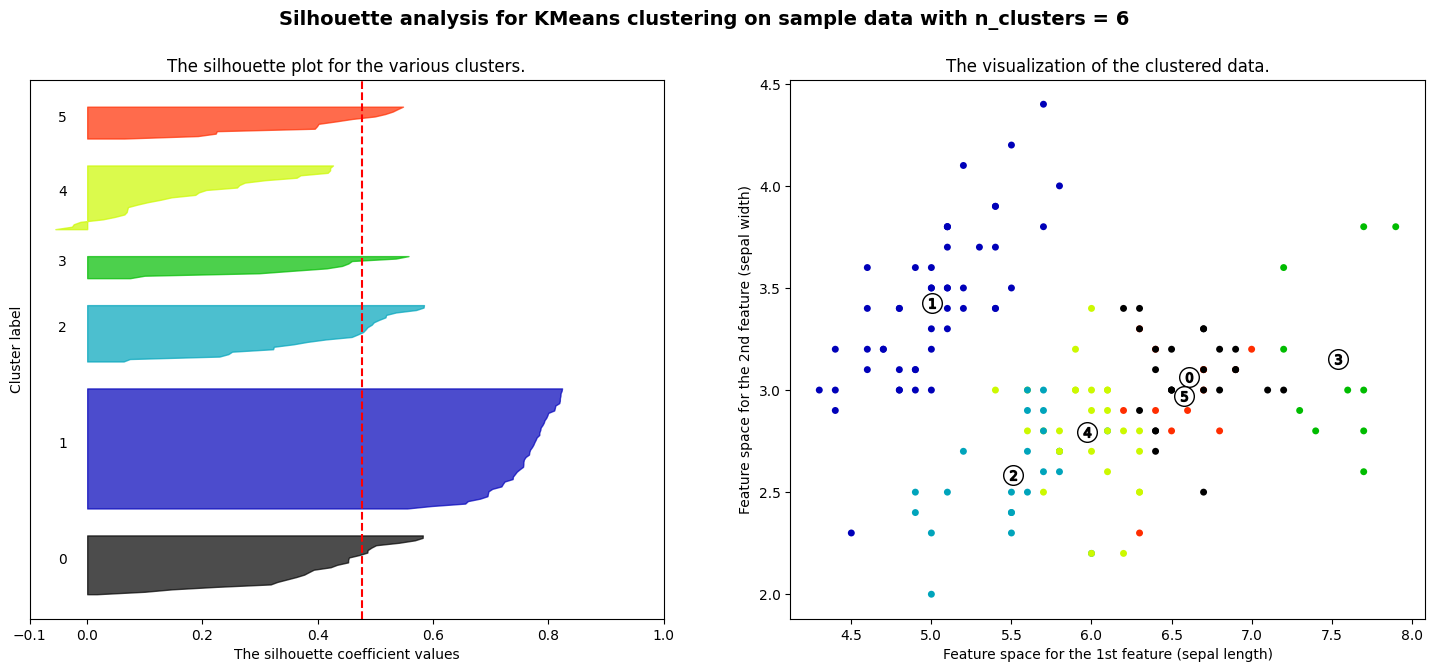

In [12]:
import matplotlib.cm as cm

#scaler = StandardScaler()
#X = scaler.fit_transform(iris.data)

X = iris.iloc[:, :4].values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=100, lw=0, alpha=1,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature (sepal length)")
    ax2.set_ylabel("Feature space for the 2nd feature (sepal width)")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

WSS: 78.851441426146


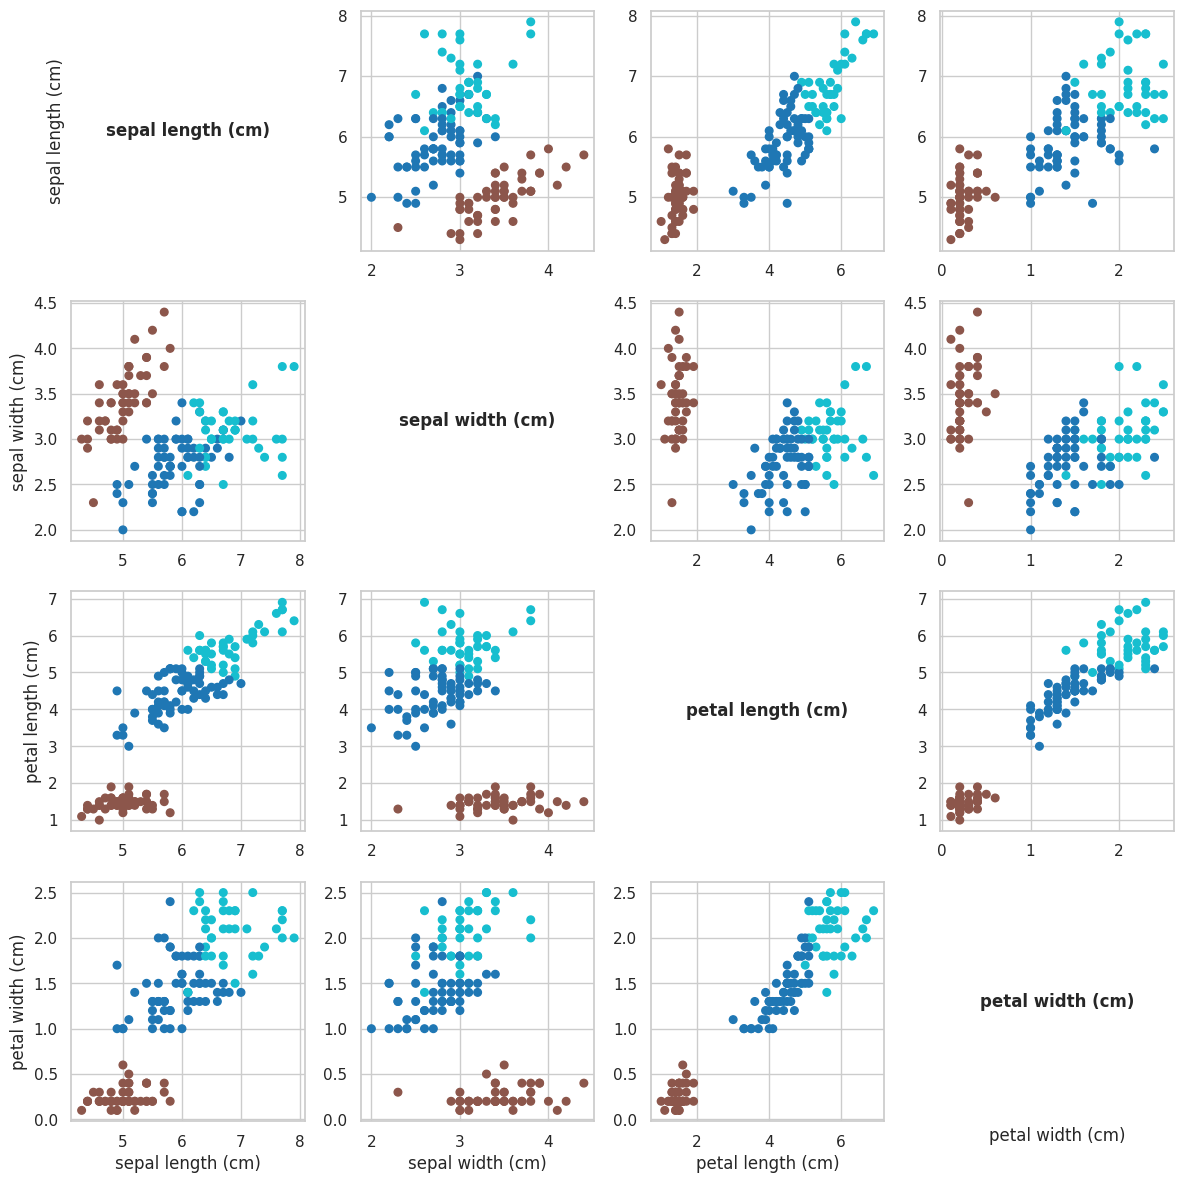

In [13]:
X = iris.iloc[:, :4].values

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

clusters = kmeans.predict(X)
print('WSS:', kmeans.inertia_)

# Create pairwise scatter plots
sns.set(style="whitegrid")
fig, axes = plt.subplots(4, 4, figsize=(12, 12))  # 4x4 grid for pairwise scatter plots
features = iris4.columns
num_features = len(features)
cmap = cm.get_cmap('tab10', 3)  # Three clusters

for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]

        if i == j:
            ax.text(0.5, 0.5, features[i], ha='center', va='center', fontsize=12, fontweight='bold')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_frame_on(False)
        else:
            colors = np.array([cmap(k) for k in clusters])  # Assign colors based on cluster
            ax.scatter(iris.iloc[:, j], iris.iloc[:, i], s=30, color=colors)

        if i == num_features - 1:
            ax.set_xlabel(features[j])
        if j == 0:
            ax.set_ylabel(features[i])

plt.tight_layout()
plt.show()


Silhouette analysis provides some guidelines but it is just one perspective and we should try more approaches and looks for some sort of agreement. For instance, we might check what the elbow and knee analysis has to say about this.

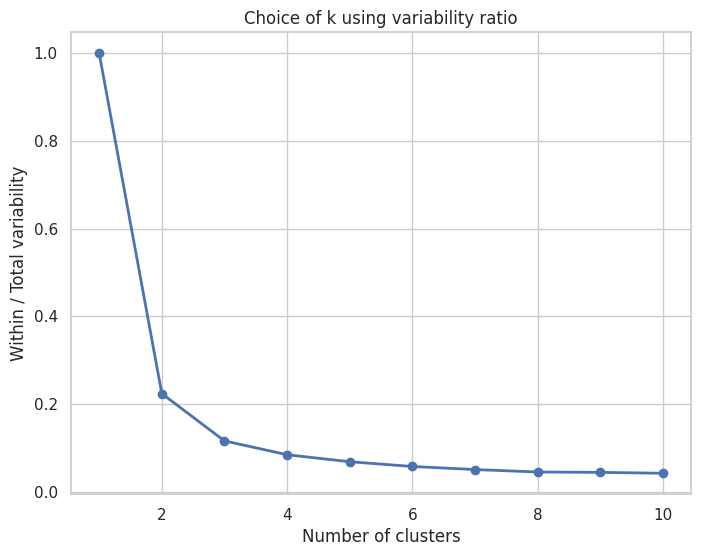

In [14]:
w = []
b = []
totss = np.sum((X - X.mean(axis=0))**2)
for k_val in range(1, 11):
    km = KMeans(n_clusters=k_val, random_state=42).fit(X)
    withinss = km.inertia_
    between_ss = totss - withinss
    w.append(withinss)
    b.append(between_ss)
ratio = np.array(w) / (np.array(w) + np.array(b))
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), ratio, marker='o', linewidth=2)
plt.xlabel("Number of clusters")
plt.ylabel("Within / Total variability")
plt.title("Choice of k using variability ratio")
plt.show()

## Initialization effect

*n_init* runs k-means multiple times with different initializations and choose the best one wrt to WSS (also called *inertia*).

The default initialization in scikit-learn is *k-means++* which is optimized to spread out the initial positioning of the centroid. With this initialization, the default *n_init* is 1, while with the *random* initialization the default *n_init* is 10

WSS: 2816.0038196102405
WSS: 2812.8222498026266


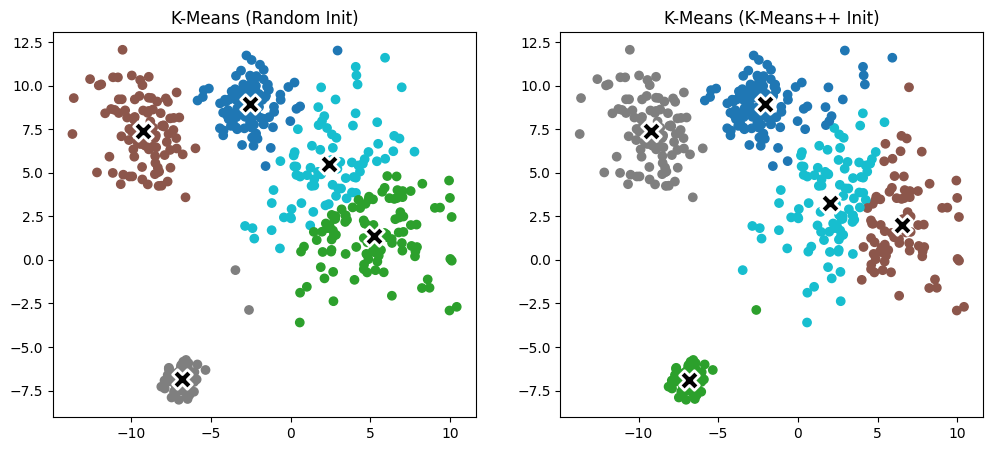

In [6]:
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=[1.0, 2.5, 0.5, 1.8, 3.2], random_state=42)

# Fit K-Means with random initialization
kmeans_random = KMeans(n_clusters=5, init='random', random_state=12, n_init=1)
kmeans_random.fit(X)
clusters_random = kmeans_random.predict(X)
print('WSS:', kmeans_random.inertia_)

# Fit K-Means with k-means++ initialization
kmeans_plus = KMeans(n_clusters=5, init='k-means++', random_state=12, n_init=1)
kmeans_plus.fit(X)
clusters_plus = kmeans_plus.predict(X)
print('WSS:', kmeans_plus.inertia_)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for random initialization
axes[0].scatter(X[:, 0], X[:, 1], c=clusters_random, cmap=cm.get_cmap('tab10', 5))
axes[0].scatter(kmeans_random.cluster_centers_[:, 0], kmeans_random.cluster_centers_[:, 1],
                s=200, c='black', marker='X', edgecolors='white', linewidth=2)
axes[0].set_title("K-Means (Random Init)")

# Scatter plot for k-means++ initialization
axes[1].scatter(X[:, 0], X[:, 1], c=clusters_plus, cmap=cm.get_cmap('tab10', 5))
axes[1].scatter(kmeans_plus.cluster_centers_[:, 0], kmeans_plus.cluster_centers_[:, 1],
                s=200, c='black', marker='X', edgecolors='white', linewidth=2)
axes[1].set_title("K-Means (K-Means++ Init)")

plt.show()


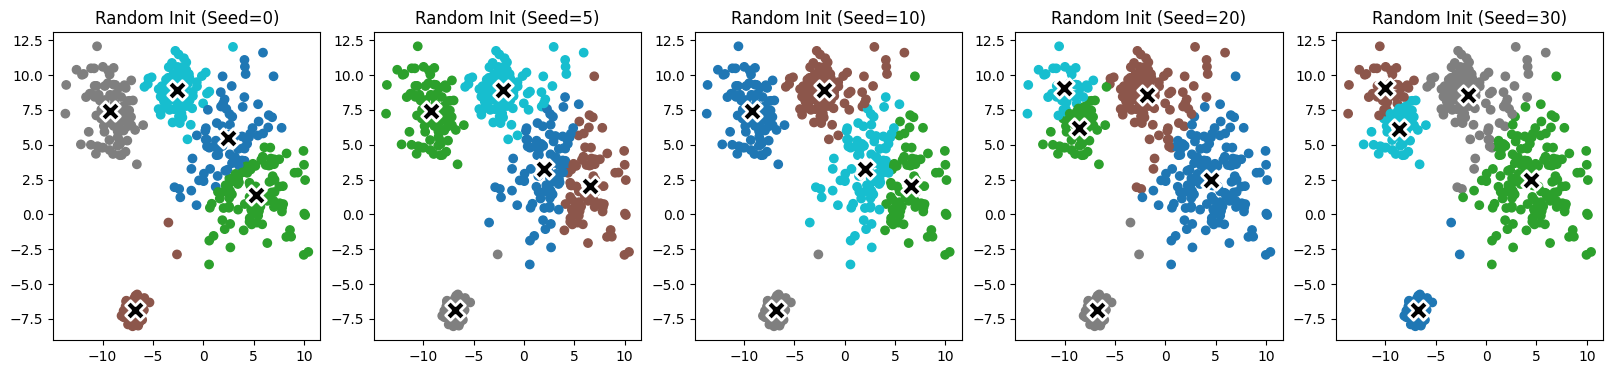

In [7]:
# Run K-Means multiple times with different seeds
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, seed in enumerate([0, 5, 10, 20, 30]):
    kmeans = KMeans(n_clusters=5, init='random', random_state=seed, n_init=1)
    kmeans.fit(X)
    clusters = kmeans.predict(X)

    # Scatter plot
    axes[i].scatter(X[:, 0], X[:, 1], c=clusters, cmap=cm.get_cmap('tab10', 5))
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                    s=200, c='black', marker='X', edgecolors='white', linewidth=2)
    axes[i].set_title(f"Random Init (Seed={seed})")

plt.show()


## Standardization

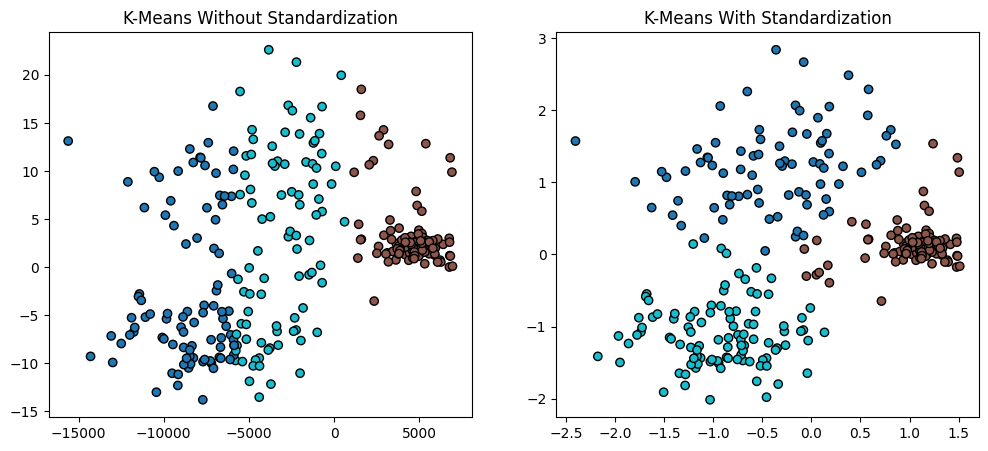

In [8]:
# Generate synthetic data with three clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=[5.0, 1.0, 3.0], random_state=42)

# Scale one feature to be much larger than the other
X[:, 0] *= 1000  # Multiply first feature by 1000 (large scale)

# K-Means clustering without standardization
kmeans_no_scaling = KMeans(n_clusters=3, random_state=42)
clusters_no_scaling = kmeans_no_scaling.fit_predict(X)

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering with standardization
kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_scaled = kmeans_scaled.fit_predict(X_scaled)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Without Standardization
axes[0].scatter(X[:, 0], X[:, 1], c=clusters_no_scaling, cmap='tab10', edgecolors='k')
axes[0].set_title("K-Means Without Standardization")

# With Standardization
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_scaled, cmap='tab10', edgecolors='k')
axes[1].set_title("K-Means With Standardization")

plt.show()


## Dimensionality Reduction

An example where PCA is harmful


Contingency Table - Original 2D:
K-Means_2D    0    1    2
True                     
0             0    1  199
1           199    1    0
2             3  197    0 

Contingency Table - After PCA to 1D:
K-Means_1D    0    1    2
True                     
0             4    0  196
1           174   26    0
2            24  176    0


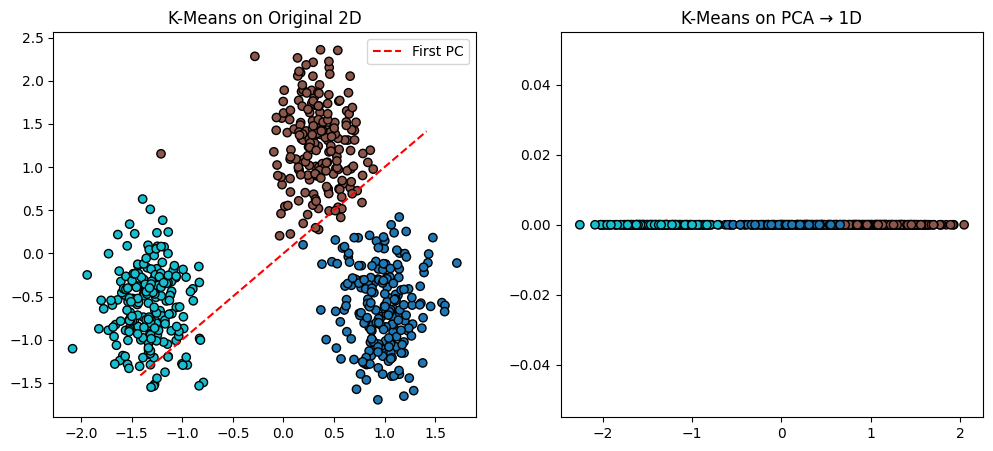

In [9]:
# --------------------------------------------------------
# Generate a simple 2D dataset with 3 well-separated clusters
# --------------------------------------------------------
rng = np.random.RandomState(42)

n_per_cluster = 200

# Cluster 1 around (0, 0)
X1 = rng.normal(loc=[0, 0], scale=1.0, size=(n_per_cluster, 2))
y1 = np.zeros(n_per_cluster, dtype=int)

# Cluster 2 around (10, 0)
X2 = rng.normal(loc=[10, 0], scale=1.0, size=(n_per_cluster, 2))
y2 = np.ones(n_per_cluster, dtype=int)

# Cluster 3 around (5, 5)
X3 = rng.normal(loc=[7, 4], scale=1.0, size=(n_per_cluster, 2))
y3 = np.full(n_per_cluster, 2, dtype=int)

# Combine into one dataset
X_2D = np.vstack([X1, X2, X3])
y_true = np.concatenate([y1, y2, y3])

# Standardize the data so it's centered at (0,0) with unit variance
scaler = StandardScaler()
X_2D_scaled = scaler.fit_transform(X_2D)

# --------------------------------------------------------
# K-Means on the original 2D data
# --------------------------------------------------------
kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_2d = kmeans_2d.fit_predict(X_2D_scaled)

# --------------------------------------------------------
# PCA to 1D, then K-Means
# --------------------------------------------------------
pca_1d = PCA(n_components=1, random_state=42)
X_1D = pca_1d.fit_transform(X_2D_scaled)

kmeans_1d = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_1d = kmeans_1d.fit_predict(X_1D)


# --------------------------------------------------------
# Contingency tables
# --------------------------------------------------------
cont_2d = pd.crosstab(pd.Series(y_true, name='True'),
                      pd.Series(labels_2d, name='K-Means_2D'))
cont_1d = pd.crosstab(pd.Series(y_true, name='True'),
                      pd.Series(labels_1d, name='K-Means_1D'))

print("\nContingency Table - Original 2D:")
print(cont_2d, "\n")
print("Contingency Table - After PCA to 1D:")
print(cont_1d)

# --------------------------------------------------------
# Plot results: including the 1D PCA direction
# --------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# (A) Scatter in original 2D (scaled), color by K-Means cluster
axes[0].scatter(X_2D_scaled[:, 0], X_2D_scaled[:, 1],
                c=labels_2d, cmap="tab10", edgecolor='k')
axes[0].set_title("K-Means on Original 2D")

pc_vector = pca_1d.components_[0]  # shape: (2,)
# We'll draw a line passing through the origin (center = 0,0 after StandardScaler)
# param "alpha" will range from -5 to +5 for a visually nice line
alpha_vals = np.linspace(-2, 2, 100)
line_x = alpha_vals * pc_vector[0]
line_y = alpha_vals * pc_vector[1]

axes[0].plot(line_x, line_y, color='red', linestyle='--', label='First PC')
axes[0].legend()

axes[1].scatter(X_1D[:, 0], np.zeros_like(X_1D[:, 0]),
                c=labels_1d, cmap="tab10", edgecolor='k')
axes[1].set_title("K-Means on PCA → 1D")

plt.show()


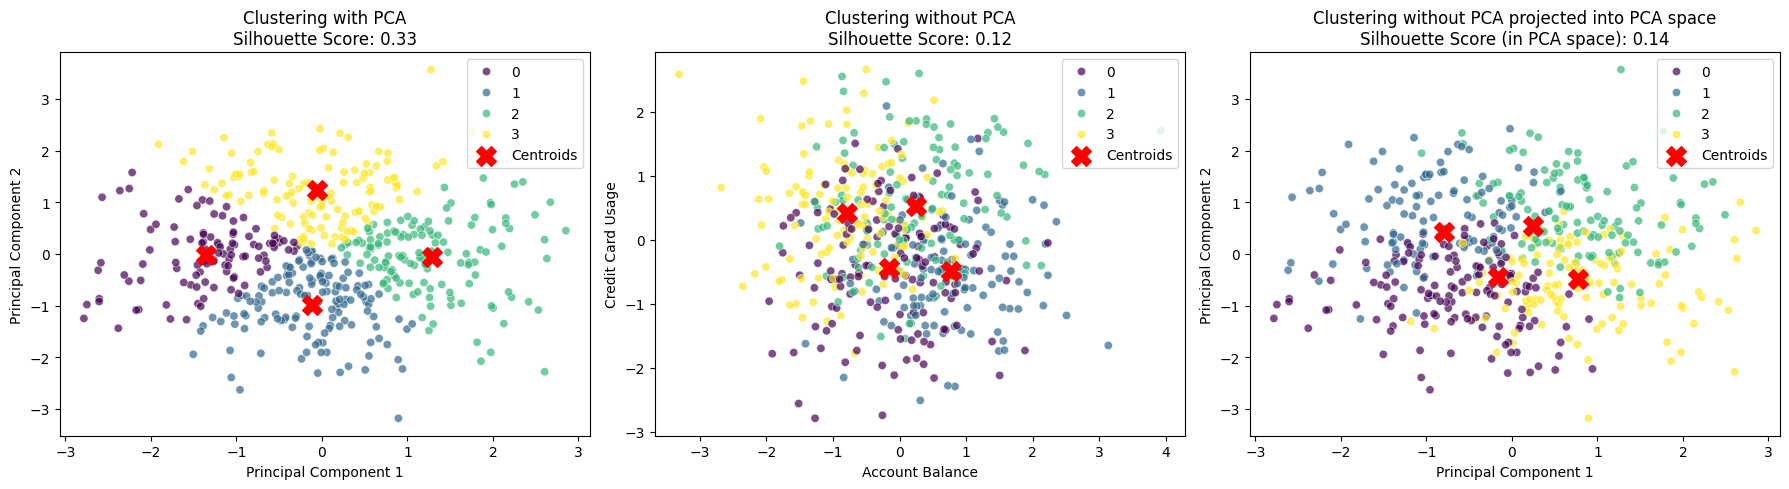

In [10]:
np.random.seed(42)
num_customers = 500

data = {
    'account_balance': np.random.normal(5000, 2000, num_customers),
    'credit_card_usage': np.random.normal(2000, 800, num_customers),
    'loan_amount': np.random.normal(10000, 5000, num_customers),
    'investment_value': np.random.normal(15000, 7000, num_customers),
    'transaction_frequency': np.random.randint(1, 50, num_customers),
    'monthly_deposits': np.random.normal(3000, 1000, num_customers),
}

df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_data = pca.fit_transform(scaled_data)

# Apply K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(pca_data)

df['Cluster'] = clusters

# Apply K-Means clustering on original high-dimensional data
kmeans_original = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters_original = kmeans_original.fit_predict(scaled_data)

# Compute silhouette scores for comparison
silhouette_pca = silhouette_score(pca_data, clusters)
silhouette_original = silhouette_score(scaled_data, clusters_original)
silhouette_original_pca_space = silhouette_score(pca_data, clusters_original)

# Plot Clustering with PCA
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'Clustering with PCA\nSilhouette Score: {silhouette_pca:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')

# Plot Clustering without PCA using first two original features
plt.subplot(1, 3, 2)
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=clusters_original, palette='viridis', alpha=0.7)
plt.scatter(kmeans_original.cluster_centers_[:, 0], kmeans_original.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'Clustering without PCA\nSilhouette Score: {silhouette_original:.2f}')
plt.xlabel('Account Balance')
plt.ylabel('Credit Card Usage')
plt.legend(loc='upper right')

# Plot Clustering without PCA in the PCA space
plt.subplot(1, 3, 3)
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=clusters_original, palette='viridis', alpha=0.7)
plt.scatter(kmeans_original.cluster_centers_[:, 0], kmeans_original.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'Clustering without PCA projected into PCA space\nSilhouette Score (in PCA space): {silhouette_original_pca_space:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Limitations of K-Means

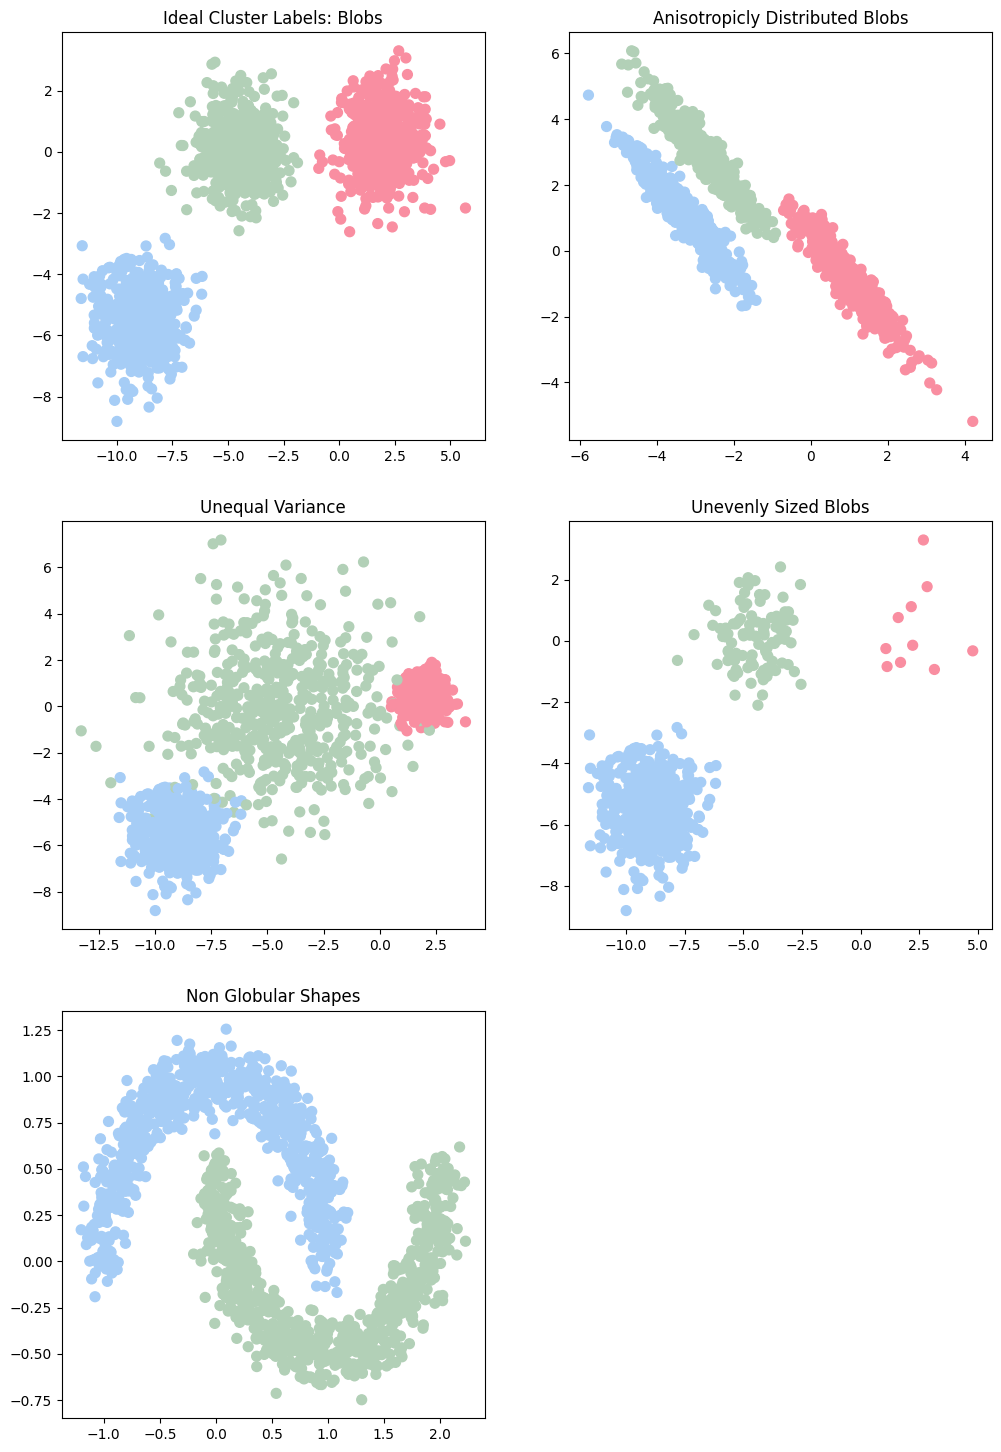

In [11]:
# Define the color palettes
data_colors = ['#a6cdf6','#b2d0b7','#f98ea1']
background_cmap3 = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])

plt.figure(figsize=(12, 18))
n_samples = 1500
random_state = 170

###############################################
# Incorrect number of clusters
# make_blobs generate by default 3 isotropic Gaussian blobs. What if you specify an incorrect number of blobs, like 2?
###############################################
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

plt.subplot(321)
plt.scatter(X[:, 0], X[:, 1], s=50, c=[data_colors[label] for label in y], cmap=background_cmap3)
plt.title("Ideal Cluster Labels: Blobs")

###############################################
# Anisotropicly distributed data
###############################################
transformation = np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
X_aniso = np.dot(X, transformation)

plt.subplot(322)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=50, c=[data_colors[label] for label in y], cmap=background_cmap3)
plt.title("Anisotropicly Distributed Blobs")

###############################################
# Different variance
###############################################
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

plt.subplot(323)
plt.scatter(X_varied[:, 0], X_varied[:, 1], s=50, c=[data_colors[label] for label in y_varied], cmap=background_cmap3)
plt.title("Unequal Variance")

###############################################
# Unevenly sized blobs
###############################################
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_filtered = np.concatenate((y[y == 0][:500], y[y == 1][:100], y[y == 2][:10]))

plt.subplot(324)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], s=50, c=[data_colors[label] for label in y_filtered], cmap=background_cmap3)
plt.title("Unevenly Sized Blobs")

###############################################
# Unevenly sized blobs
###############################################
X, y = make_moons(n_samples=1500, random_state=170, noise=0.1)

plt.subplot(325)
plt.scatter(X[:, 0], X[:, 1], s=50, c=[data_colors[l] for l in y], cmap=background_cmap3)
plt.title("Non Globular Shapes")


plt.show()

Text(0.5, 1.0, 'Unevenly Sized Blobs')

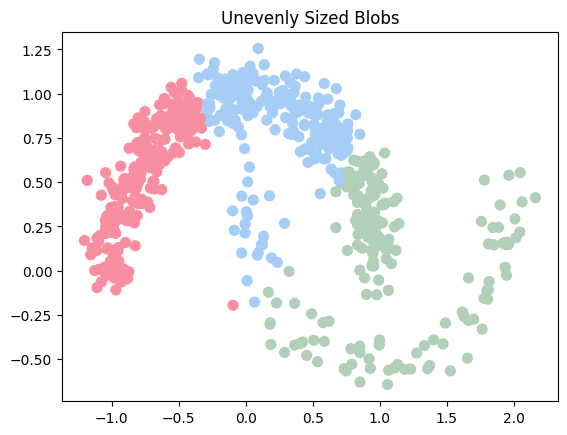

In [12]:
###############################################
# Unevenly sized blobs
###############################################
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_filtered = np.concatenate((y[y == 0][:500], y[y == 1][:100], y[y == 2][:10]))


km_labels = KMeans(n_clusters = 3, random_state=42, n_init=10).fit_predict(X_filtered)



plt.scatter(X_filtered[:, 0], X_filtered[:, 1], s=50, c=[data_colors[label] for label in km_labels], cmap=background_cmap3)
plt.title("Unevenly Sized Blobs")


Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

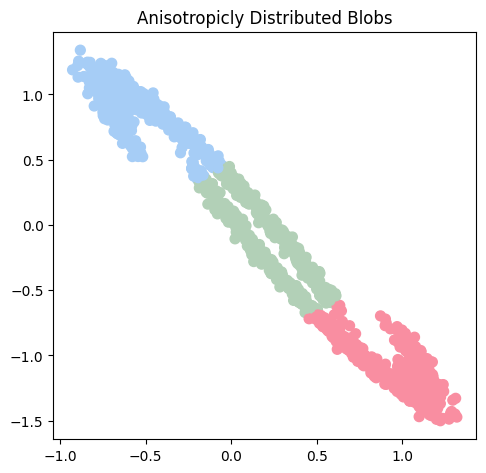

In [13]:
# Define the color palettes
data_colors = ['#a6cdf6','#b2d0b7','#f98ea1']
background_cmap3 = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])

plt.figure(figsize=(12, 18))
n_samples = 1500
random_state = 170

###############################################
# Anisotropicly distributed data
###############################################
transformation = np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
X_aniso = np.dot(X, transformation)


km_labels = KMeans(n_clusters = 3, random_state=42, n_init=10).fit_predict(X_aniso)

plt.subplot(322)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=50, c=[data_colors[label] for label in km_labels], cmap=background_cmap3)
plt.title("Anisotropicly Distributed Blobs")


Text(0.5, 1.0, 'Non Globular Shapes')

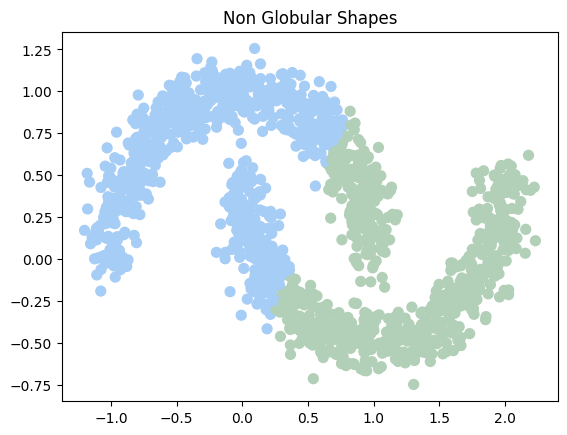

In [14]:
###############################################
# Unevenly sized blobs
###############################################
X, y = make_moons(n_samples=1500, random_state=170, noise=0.1)

km_labels = KMeans(n_clusters = 2, n_init = 10, random_state = 42).fit_predict(X)


plt.scatter(X[:, 0], X[:, 1], s=50, c=[data_colors[l] for l in km_labels], cmap=background_cmap3)
plt.title("Non Globular Shapes")


# Gaussian Mixture Models

## Iterative Simulation

Adapted from https://github.com/Ransaka/GMM-from-scratch

In [15]:
from scipy.stats import multivariate_normal
from scipy.stats import norm

In [16]:
def plot_pdf(mu,sigma,label,alpha=0.5,linestyle='k--',density=True,color='green'):
    """
    Plot 1-D data and its PDF curve.

    Parameters
    ----------
    X : array-like, shape (n_samples,)
        The input data.
    """
    # Compute the mean and standard deviation of the data

    # Plot the data

    X = norm.rvs(mu, sigma, size=1000)

    plt.hist(X, bins=50, density=density, alpha=alpha,label=label,color=color)

    # Plot the PDF
    x = np.linspace(X.min(), X.max(), 1000)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, linestyle)

In [17]:
n_samples = 100
mu1, sigma1 = -5, 1.2
mu2, sigma2 = 5, 1.8
mu3, sigma3 = 0, 1.6

x1 = np.random.normal(loc = mu1, scale = np.sqrt(sigma1), size = n_samples)
x2 = np.random.normal(loc = mu2, scale = np.sqrt(sigma2), size = n_samples)
x3 = np.random.normal(loc = mu3, scale = np.sqrt(sigma3), size = n_samples)

X = np.concatenate((x1,x2,x3))

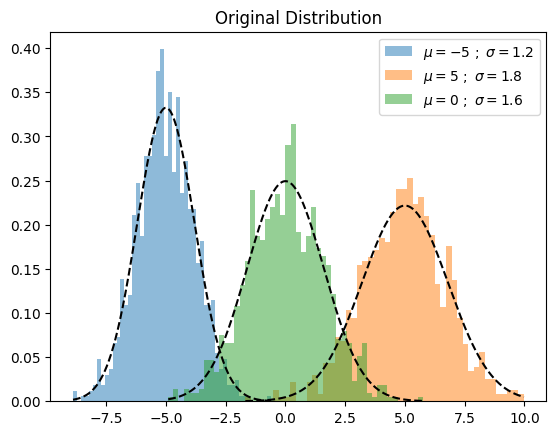

In [18]:
plot_pdf(mu1,sigma1,label=r"$\mu={} \ ; \ \sigma={}$".format(mu1,sigma1),color=None)
plot_pdf(mu2,sigma2,label=r"$\mu={} \ ; \ \sigma={}$".format(mu2,sigma2),color=None)
plot_pdf(mu3,sigma3,label=r"$\mu={} \ ; \ \sigma={}$".format(mu3,sigma3),color=None)
plt.title("Original Distribution")
plt.legend()
plt.show()

Formulas needed for GMM

In [19]:
def random_init(n_components):
    pi = np.ones((n_components)) / n_components
    means = np.random.choice(X, n_components)
    variances = np.random.random_sample(size=n_components)
    plot_pdf(means[0],variances[0],'Random Init 01',)
    plot_pdf(means[1],variances[1],'Random Init 02',color='blue')
    plot_pdf(means[2],variances[2],'Random Init 03',color='orange')

    plt.title("Random Initialization")

    plt.legend()
    plt.show()

    return means,variances,pi

def step_expectation(X,n_components,means,variances):
    weights = np.zeros((n_components,len(X)))
    for j in range(n_components):
        weights[j,:] = norm(loc=means[j],scale=np.sqrt(variances[j])).pdf(X)
    return weights

def step_maximization(X,weights,means,variances,n_compenents,pi):
    r = []
    for j in range(n_compenents):
        r.append((weights[j] * pi[j]) / (np.sum([weights[i] * pi[i] for i in range(n_compenents)], axis=0)))

        means[j] = np.sum(r[j] * X) / (np.sum(r[j]))
        variances[j] = np.sum(r[j] * np.square(X - means[j])) / (np.sum(r[j]))

        pi[j] = np.mean(r[j])

    return variances,means,pi

def plot_intermediate_steps(means,variances,step):

    plot_pdf(mu1,sigma1,alpha=0.0,linestyle='r--',label='Original Distibutions')
    plot_pdf(mu2,sigma2,alpha=0.0,linestyle='r--',label='Original Distibutions')
    plot_pdf(mu3,sigma3,alpha=0.0,linestyle='r--',label='Original Distibutions')

    color_gen = (x for x in ['green','blue','orange'])

    for mu,sigma in zip(means,variances):
        plot_pdf(mu,sigma,alpha=0.5,label='d',color=next(color_gen))
    plt.title(f"step: {step}")
    plt.show()

Implementation

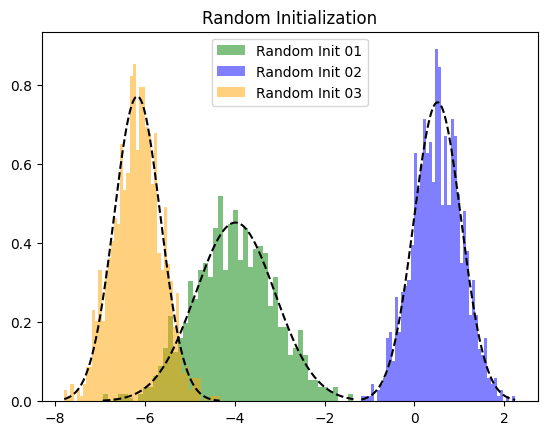

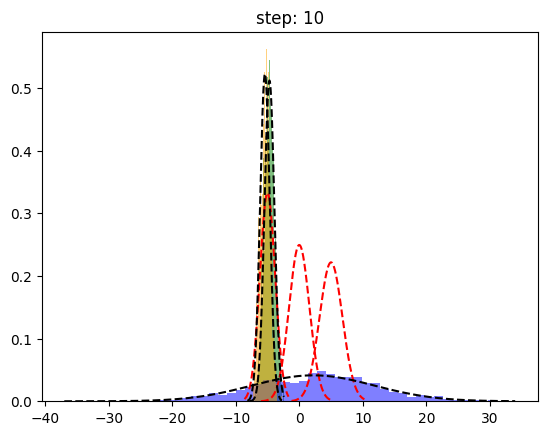

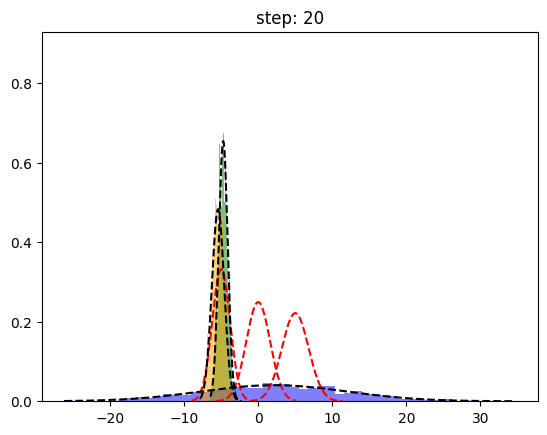

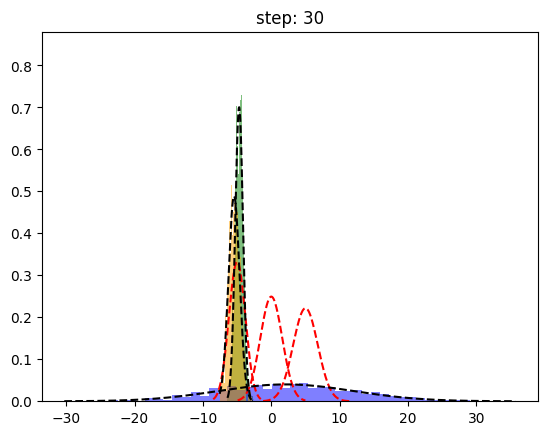

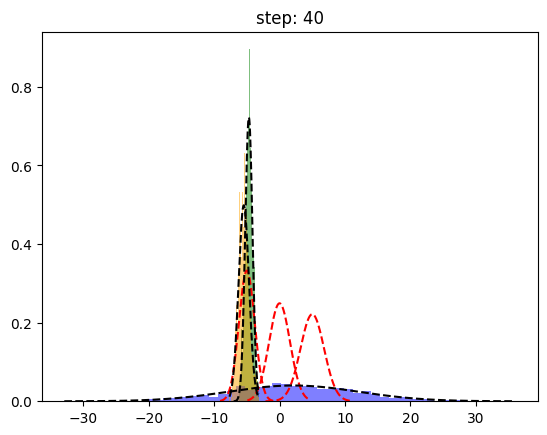

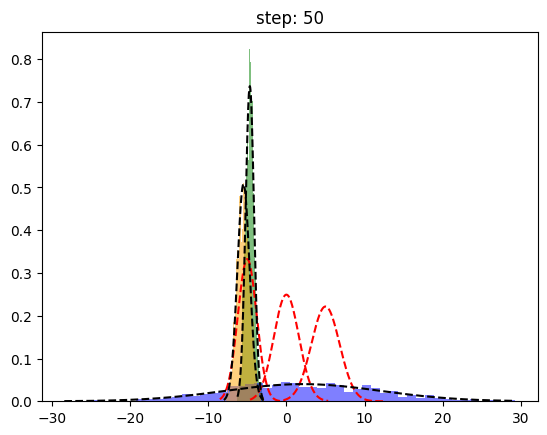

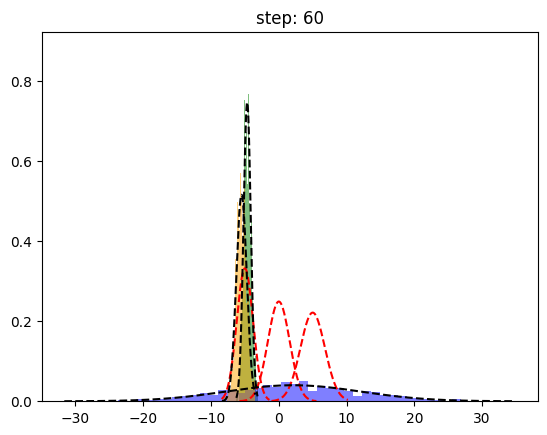

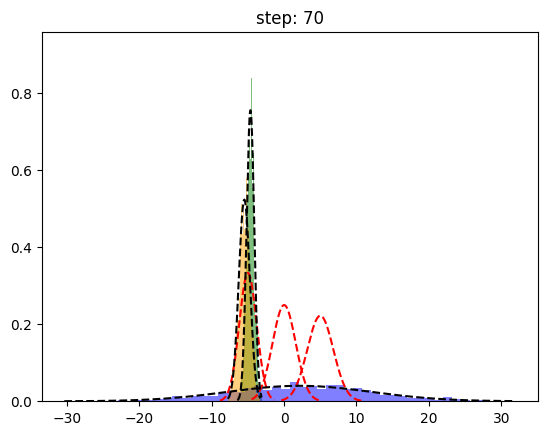

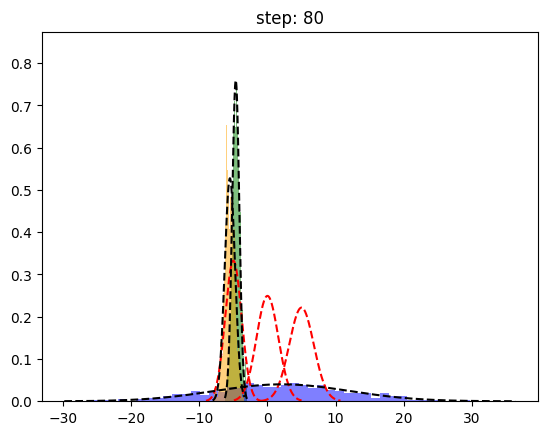

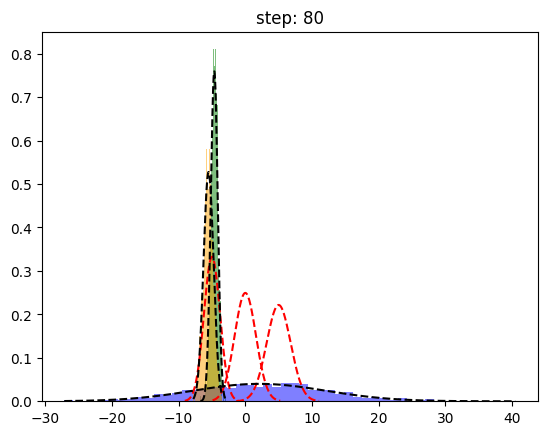

In [20]:
n_components=3
n_steps=80

means,variances,pi = random_init(n_components)

for step in range(1, n_steps+1):
    weights = step_expectation(X,n_components,means,variances)
    variances,means,pi = step_maximization(X, weights, means, variances, n_components, pi)
    if step % 10 == 0:
      plot_intermediate_steps(means,variances,step)
plot_intermediate_steps(means,variances, step)

## Iris

In [21]:
def plot_gmm(X, model, ax, title):
    """Plot GMM clustering results with covariance ellipses."""
    y_prob = model.predict_proba(X)  # Get probabilities
    y_pred = model.predict(X)  # Get hard cluster assignments
    max_prob = y_prob.max(axis=1)  # Take the highest probability per point

    # Normalize alpha between 0 and 1 (probabilities)
    norm = Normalize(vmin=0, vmax=1)
    alpha_values = norm(max_prob)  # Normalize alpha

    # Dynamically generate cluster colors
    num_clusters = model.n_components
    cluster_cmap = cm.get_cmap('tab10', num_clusters)  # Ensure unique colors
    colors = np.array([cluster_cmap(i) for i in y_pred])  # Assign colors based on cluster
    colors[:, -1] = alpha_values  # Set alpha transparency in RGBA

    # Scatter plot
    ax.scatter(X[:, 0], X[:, 1], s=50, color=colors)
    ax.scatter(model.means_[:, 0], model.means_[:, 1], marker='*', s=200, c='black', edgecolors='white', linewidth=2)

    # Plot covariance ellipses
    for i, (mean, cov) in enumerate(zip(model.means_, model.covariances_)):
        plot_covariance_ellipse(ax, mean, cov, 'black')

    ax.set_title(title)

    return ax

def plot_covariance_ellipse(ax, mean, cov, color):
    """Plot a Gaussian covariance ellipse."""
    if cov.shape == (2, 2):  # Full covariance
        U, S, Vt = np.linalg.svd(cov)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(S)  # 2 standard deviations
    else:  # Diagonal covariance
        angle = 0
        width, height = 2 * np.sqrt(cov)

    ellipse = Ellipse(mean, width, height, angle=angle, edgecolor=color, facecolor='none', linestyle='--', linewidth=2)
    ax.add_patch(ellipse)

In [22]:
iris_data = load_iris()
iris4 = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
species_name = iris_data.target
iris = iris4.copy()

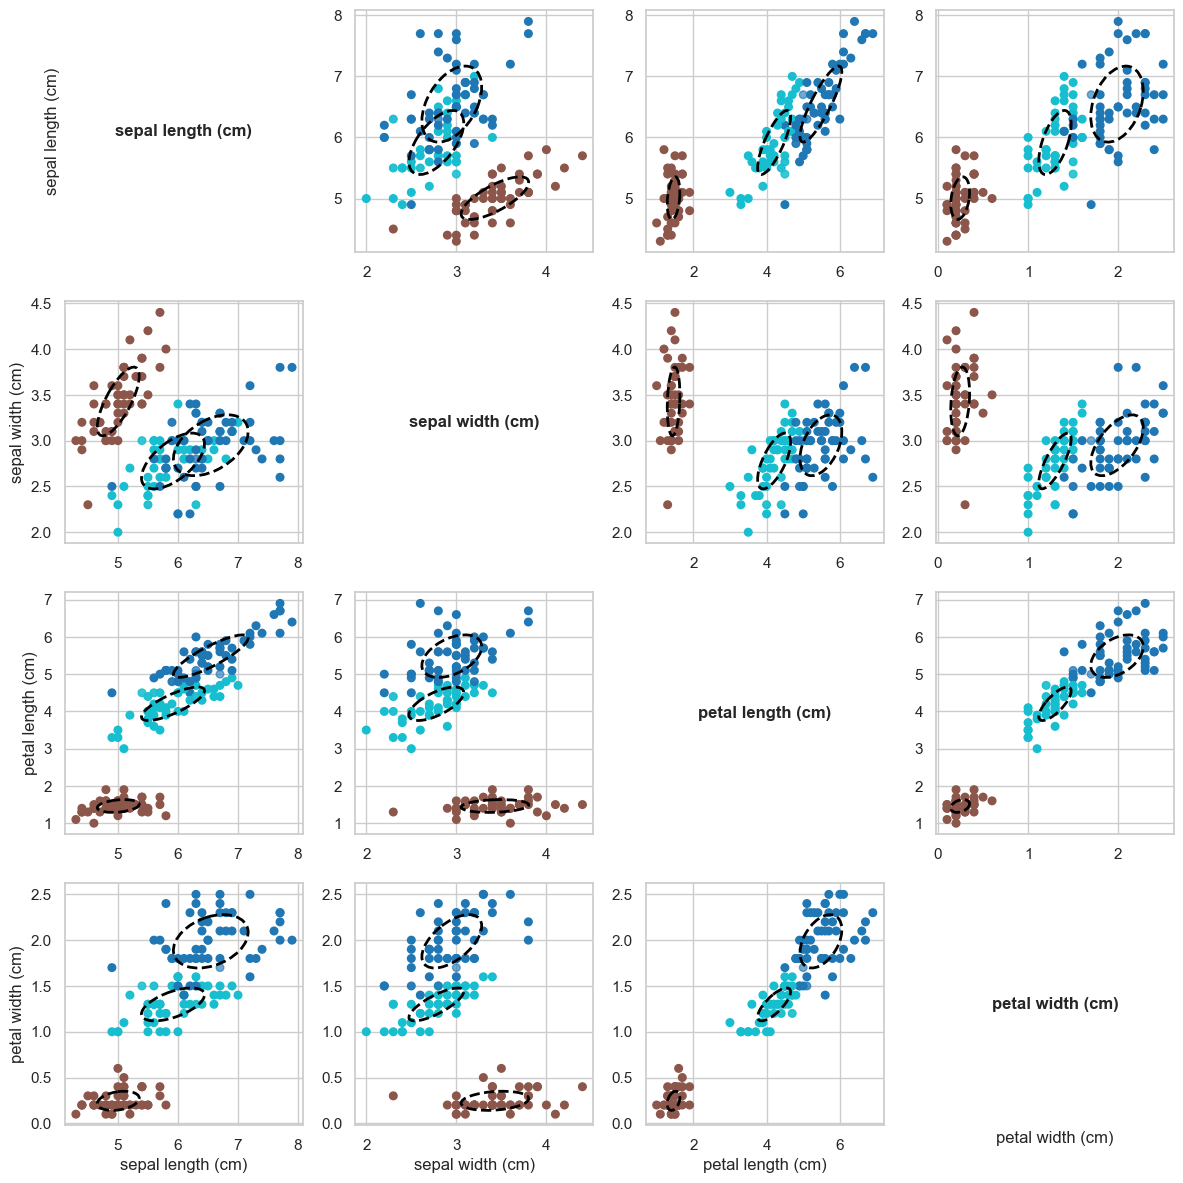

In [23]:
# Fit GMM with 3 clusters (since we know Iris has 3 species)
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(iris)

# Predict cluster assignments and probabilities
clusters = gmm.predict(iris)
probabilities = gmm.predict_proba(iris)

# Create pairwise scatter plots
sns.set(style="whitegrid");
fig, axes = plt.subplots(4, 4, figsize=(12, 12));
features = iris.columns
num_features = len(features)
cmap = cm.get_cmap('tab10', 3);

# Loop through feature pairs
for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]

        # Diagonal: Show feature names
        if i == j:
            ax.text(0.5, 0.5, features[i], ha='center', va='center', fontsize=12, fontweight='bold')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_frame_on(False)
        else:
            # Scatter plot
            norm = Normalize(vmin=0, vmax=1)
            colors = np.array([cmap(k) for k in clusters])  # Assign colors based on cluster
            colors[:, -1] = norm(probabilities.max(axis=1))  # Adjust transparency by probability

            ax.scatter(iris.iloc[:, j], iris.iloc[:, i], s=30, color=colors)

            # Plot covariance ellipses
            for k in range(gmm.n_components):
                mean = gmm.means_[k][[j, i]]  # Select only relevant dimensions
                cov = gmm.covariances_[k][np.ix_([j, i], [j, i])]  # Extract 2x2 covariance matrix
                plot_covariance_ellipse(ax, mean, cov, color='black')

        # Set labels
        if i == num_features - 1:
            ax.set_xlabel(features[j])
        if j == 0:
            ax.set_ylabel(features[i])

plt.tight_layout()
plt.show()

## Comparison with k-means

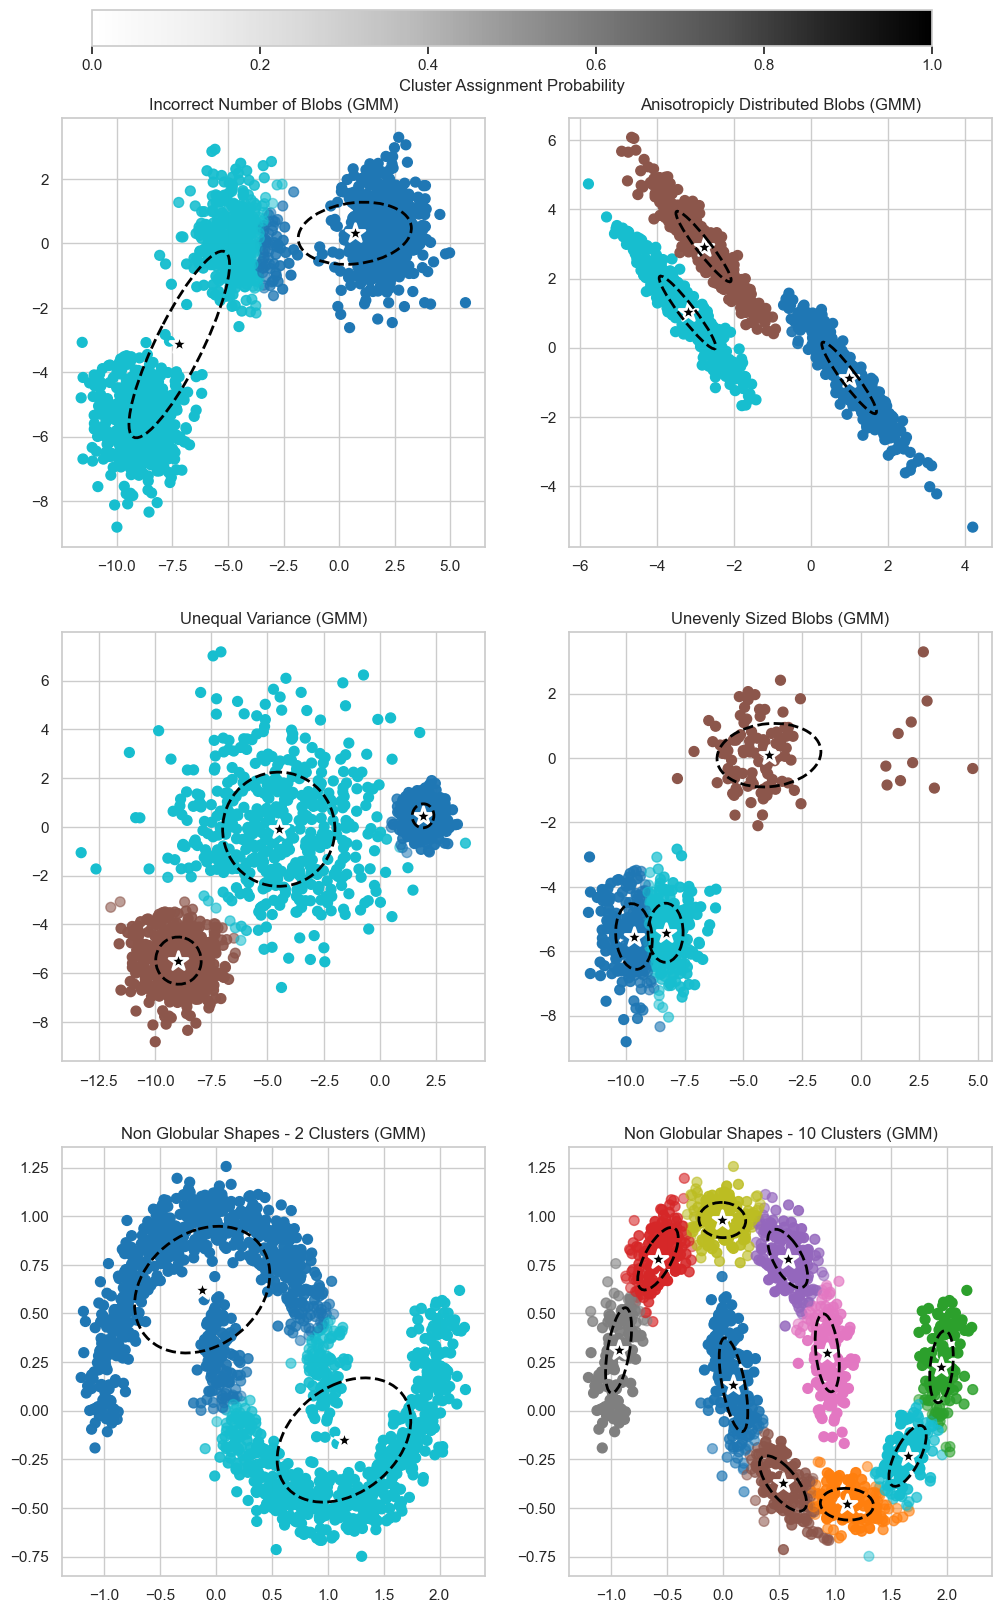

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))  # 3x2 Grid
fig.subplots_adjust(top=0.92)  # Adjust top spacing for color bar

n_samples = 1500
random_state = 170

###############################################
# Incorrect number of clusters
###############################################
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
model = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state).fit(X)
plot_gmm(X, model, axes[0, 0], "Incorrect Number of Blobs (GMM)")

###############################################
# Anisotropicly distributed data
###############################################
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
model = GaussianMixture(n_components=3, covariance_type='full', random_state=random_state).fit(X_aniso)
plot_gmm(X_aniso, model, axes[0, 1], "Anisotropicly Distributed Blobs (GMM)")

###############################################
# Different variance
###############################################
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
model = GaussianMixture(n_components=3, covariance_type='full', random_state=random_state).fit(X_varied)
plot_gmm(X_varied, model, axes[1, 0], "Unequal Variance (GMM)")

###############################################
# Unevenly sized blobs
###############################################
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
model = GaussianMixture(n_components=3, covariance_type='full', random_state=random_state).fit(X_filtered)
plot_gmm(X_filtered, model, axes[1, 1], "Unevenly Sized Blobs (GMM)")

###############################################
# Non Globular Shapes
###############################################
X, y = make_moons(n_samples=1500, random_state=170, noise=0.1)

model = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state).fit(X)
plot_gmm(X, model, axes[2, 0], "Non Globular Shapes - 2 Clusters (GMM)")

model = GaussianMixture(n_components=10, covariance_type='full', random_state=random_state).fit(X)
plot_gmm(X, model, axes[2, 1], "Non Globular Shapes - 10 Clusters (GMM)")

# Add the colorbar at the top
cax = fig.add_axes([0.15, 0.96, 0.7, 0.02])  # [left, bottom, width, height]
fig.colorbar(cm.ScalarMappable(norm=Normalize(0, 1), cmap='Greys'), cax=cax, orientation='horizontal', label="Cluster Assignment Probability")

plt.show()


## Adjusted Rand Index (ARI)

The Adjusted Rand Index (ARI) measures the similarity between two clusterings while correcting for random chance. It is defined as:

$$
\text{ARI} = \frac{\sum_{ij} \binom{n_{ij}}{2} - \left[ \sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2} \right] / \binom{n}{2}}{\frac{1}{2} \left[ \sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2} \right] - \left[ \sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2} \right] / \binom{n}{2}}
$$

where:
- $ n_{ij} $ is the number of elements in both cluster $ i $ in the ground truth and cluster $ j $ in the predicted clustering.
- $ a_i $ is the sum of elements in row $ i $ (total points in true cluster $ i $).
- $ b_j $ is the sum of elements in column $ j $ (total points in predicted cluster $ j $).
- $ n $ is the total number of elements.
- $ \binom{n}{2} $ represents the binomial coefficient, which counts the number of ways to choose 2 elements from $ n $.

1. If the clustering perfectly matches the ground truth, $ \text{ARI} = 1 $.
2. If the clustering is random, $ \text{ARI} \approx 0 $.
3. If clustering is worse than random, $ \text{ARI} < 0 $ (rare).



In [25]:
from sklearn.metrics import adjusted_rand_score

# Load the Iris dataset
iris = load_iris()
X_iris = iris.data
true_labels_iris = iris.target  # Ground truth labels (Setosa, Versicolor, Virginica)

# Apply K-Means clustering
kmeans_iris = KMeans(n_clusters=3, random_state=42)
predicted_labels_kmeans = kmeans_iris.fit_predict(X_iris)

# Apply Gaussian Mixture Model (GMM) clustering
gmm_iris = GaussianMixture(n_components=3, random_state=42)
predicted_labels_gmm = gmm_iris.fit_predict(X_iris)

# Compute Adjusted Rand Index (ARI) for both methods
ari_kmeans = adjusted_rand_score(true_labels_iris, predicted_labels_kmeans)
ari_gmm = adjusted_rand_score(true_labels_iris, predicted_labels_gmm)

# Display ARI comparison
ari_comparison = pd.DataFrame({
    "Clustering Method": ["K-Means", "Gaussian Mixture Model (GMM)"],
    "ARI Score": [ari_kmeans, ari_gmm]
})

ari_comparison

Clustering Method  ARI Score
0                       K-Means   0.716342
1  Gaussian Mixture Model (GMM)   0.903874